In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Inspect columns in the table MEASUREMENTS

inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# Inspect columns in the table STATIONS
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [23]:
# Testing the Data
result = session.query(Station)
result

for res in result:
    print(f"{res.id},{res.station},{res.name},{res.latitude},{res.longitude},{res.elevation}")
    
result2 = session.query(Measurement.station).distinct()
for res in result2:
    print(res)
    
MeasurementCount = session.query(Measurement).count()
print(f"Measurement count is {MeasurementCount}")

1,USC00519397,WAIKIKI 717.2, HI US,21.2716,-157.8168,3.0
2,USC00513117,KANEOHE 838.1, HI US,21.4234,-157.8015,14.6
3,USC00514830,KUALOA RANCH HEADQUARTERS 886.9, HI US,21.5213,-157.8374,7.0
4,USC00517948,PEARL CITY, HI US,21.3934,-157.9751,11.9
5,USC00518838,UPPER WAHIAWA 874.3, HI US,21.4992,-158.0111,306.6
6,USC00519523,WAIMANALO EXPERIMENTAL FARM, HI US,21.33556,-157.71139,19.5
7,USC00519281,WAIHEE 837.5, HI US,21.45167,-157.84888999999998,32.9
8,USC00511918,HONOLULU OBSERVATORY 702.2, HI US,21.3152,-157.9992,0.9
9,USC00516128,MANOA LYON ARBO 785.2, HI US,21.3331,-157.8025,152.4
('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)
Measurement count is 19550


In [26]:
result3 = session.query(Measurement).order_by(Measurement.date.desc()).limit(5).all()
for res in result3:
    print(f"{res.id},{res.station},{res.date},{res.prcp},{res.tobs}")

2724,USC00519397,2017-08-23,0.0,81.0
7635,USC00514830,2017-08-23,0.0,82.0
12187,USC00519523,2017-08-23,0.08,82.0
19550,USC00516128,2017-08-23,0.45,76.0
2723,USC00519397,2017-08-22,0.0,82.0


# Exploratory Climate Analysis

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
import time
import datetime as dt
# Using regex to get date from query
import re
from matplotlib.pyplot import figure


In [28]:
# Calculate the date 1 year ago from the last data point in the database
last_data_point_query = session.query(func.max(Measurement.date))
for record in last_data_point_query:
    last_date = record 
    print(last_date)

lastdatestring = str(last_date)
print(lastdatestring)

match = re.search('\d{4}-\d{2}-\d{2}', lastdatestring)
last_date = dt.datetime.strptime(match.group(), '%Y-%m-%d').date()
print(last_date)

yearback = last_date - dt.timedelta(days=365)
print(yearback)


('2017-08-23',)
('2017-08-23',)
2017-08-23
2016-08-23


In [29]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,Measurement.prcp]
data = session.query(*sel).filter(Measurement.date >= yearback).all()


In [30]:
# Save the query results as a Pandas DataFrame and set the index to the date column
PrecipitationDF = pd.DataFrame(data, columns=['Date', 'Precipitation'])
PrecipitationDF.set_index('Date', inplace=True, )


In [31]:
# Sort the dataframe by date
PrecipitationDF = PrecipitationDF.sort_values(by = 'Date')


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
5,2016-08-23,0.70
6,2016-08-23,0.02
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


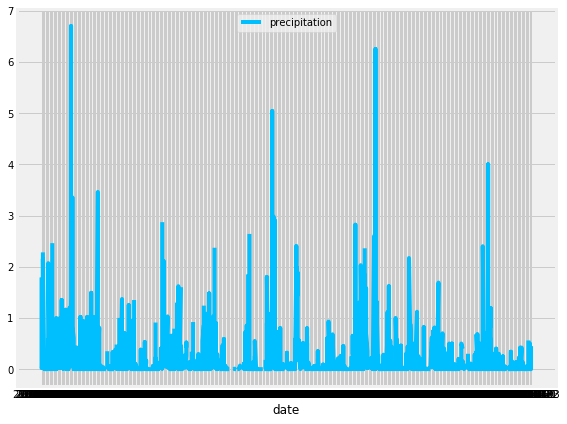

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
PrecipitationDF = PrecipitationDF.reset_index()
PrecipitationDF.head()

x_axis = PrecipitationDF['Date']
y_axis = PrecipitationDF['Precipitation']

plt.rcParams['figure.figsize'] = [8, 6]
precipitation, = plt.plot(x_axis, y_axis, color="deepskyblue", label="precipitation")
plt.xlabel("date")
plt.tight_layout()
plt.legend(handles=[precipitation], loc="upper center")
PrecipitationDF

![precipitation](Images/precipitation.png)

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
PrecipitationDF.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [34]:
# Design a query to show how many stations are available in this dataset?
station_count_query = session.query(func.count(Station.station))
station_list = []
for record in station_count_query:
    station_list.append(record)
station_list

[(9)]

In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?

# List the stations and the counts in descending order.
station_measurement_query = session.query(Measurement.station,func.count(Measurement.date)).group_by(Measurement.station).\
                      order_by(func.count(Measurement.date).desc())
activestationlist = []
for record in station_measurement_query:
    activestationlist.append(record)
activestationlist

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
result = [r.station for r in station_measurement_query]
mostactivestation = result[0]
mostactivestation

mostactivelist = []
mostactivestationquery = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == mostactivestation)
for record in mostactivestationquery:
    mostactivelist.append(record)
mostactivelist

[(54.0, 85.0, 71.66378066378067)]

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel_tobs = [Measurement.station,Measurement.date,Measurement.tobs]
query_tobs = session.query(*sel_tobs).filter(Measurement.date >= yearback).\
              filter(Measurement.station == mostactivestation)

data_tobs = query_tobs.all()
TobsDF = pd.DataFrame(data_tobs, columns = ['Station','Date','Tobs'])

![precipitation](Images/station-histogram.png)

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tripstartdate = dt.date(2017,2,20)
tripenddate = dt.date(2017,3,5)
print(calc_temps(tripstartdate,tripenddate))
result_temp = calc_temps(tripstartdate,tripenddate)

tmin = [r[0] for r in result_temp]
tavg = [r[1] for r in result_temp]
tmax = [r[2] for r in result_temp]

print(f"In order tmin,tavg,tmax: {tmin},{tavg},{tmax}")

[(61.0, 70.5813953488372, 78.0)]
In order tmin,tavg,tmax: [61.0],[70.5813953488372],[78.0]


[70.5813953488372]
17.0


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<ErrorbarContainer object of 3 artists>

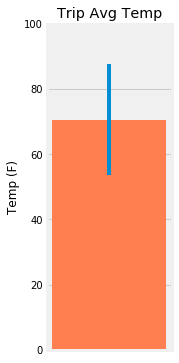

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

print(tavg)
x_axis = tripenddate

plt.rcParams['figure.figsize'] = [2, 6]
fig, ax = plt.subplots()
ax.bar(x_axis, tavg, color = "coral", align="center", width = 0.8)
ax.set_title("Trip Avg Temp")
ax.set_xlabel("Trip Average")
ax.set_ylabel("Temp (F)")
ax.set_ylim(0,100)
error = tmax[0] - tmin[0]
print(error)
ax.xaxis.set_visible(False)
ax.errorbar(x=x_axis, y=tavg, yerr=error)


In [44]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_rainfall = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
                 filter(Measurement.station == Station.station).\
                 filter(Measurement.date >= '2017-08-10').\
                 filter(Measurement.date <= '2017-08-23').\
                 group_by(Station.station).\
                 order_by(func.sum(Measurement.prcp).desc()).all()

print(total_rainfall)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 3.0), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.51), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.34), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.04), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02)]


## Optional Challenge Assignment

In [45]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [42]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [43]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


<IPython.core.display.Javascript object>


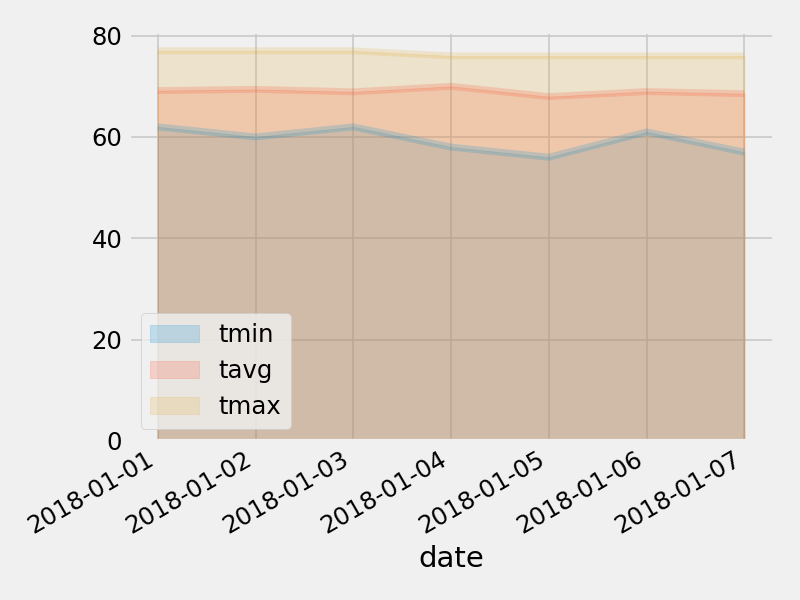

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
